# Data Cleaning and Preparation

## Overview
This dataset underwent extensive cleaning to enhance consistency, accuracy, and usability for analysis and modeling. The following cleaning steps were performed:

1. **Missing Values Handling**:
   - Replaced common placeholders for missing values (e.g., `NaN`, `0`, `NULL`, `None`) with standard `NaN`.
   - Dropped rows with missing values after evaluating and standardizing them.

2. **Data Type Adjustments**:
   - Converted numeric fields, such as `Ram` and `Weight`, to appropriate numeric types (e.g., `int64`, `float64`) after removing units like `GB` and `kg`.
   - Converted categorical text fields (`Company`, `TypeName`, `OpSys`, etc.) to `category` types to improve memory efficiency and speed in analyses.

3. **Feature Extraction and Transformation**:
   - Parsed the `ScreenResolution` column into `Resolution_Type`, `Resolution_Width`, and `Resolution_Height`, allowing for more granular analysis of display quality.
   - Created a new `PPI` (Pixels Per Inch) feature from `Resolution_Width`, `Resolution_Height`, and `Inches` to capture screen density.
   - Split `Cpu` and `Gpu` columns to extract `Cpu_Brand`, `Cpu_Series`, and `Gpu_Brand`, providing more detailed information on processing components.

4. **Storage Information Standardization**:
   - Parsed `Memory` into `Memory_GB` and `Storage_Type`, converting storage sizes to a consistent unit (GB) and extracting types (e.g., `SSD`, `HDD`, `Flash Storage`).
   - Handled mixed storage types (e.g., both `SSD` and `HDD`) by listing them in a comma-separated format in `Storage_Type`.

5. **Data Optimization**:
   - Dropped redundant original columns (`Cpu`, `Gpu`, `ScreenResolution`, and `Memory`) after extracting relevant features.
   - Verified all data types, ensuring each column is appropriately optimized for analysis.

## Usability
This cleaned dataset is now ready for further analysis and modeling. It includes optimized numeric types for calculations, categorized types for efficient grouping, and detailed feature engineering for in-depth exploration of laptop specifications. These changes make the dataset robust for visualizations, statistical analysis, or machine learning models aimed at identifying patterns or predicting laptop prices.




In [167]:
import pandas as pd
import os

df = pd.read_csv("data/laptopdata.csv")
df.head(40)


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5.0,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,6.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,7.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,8.0,Asus,Ultrabook,14,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,9.0,Acer,Ultrabook,14,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


In [168]:
import pandas as pd

# Assuming `df` is already loaded with your dataset
# Display the first few rows to understand the data structure
print("First few rows of the dataset:")
print(df.head())

# Check for null values directly
print("\nNull values count by column:")
print(df.isnull().sum())

# Identify potential missing value placeholders for each column
missing_values = ['NaN', 'nan', '?', '0', '', 'None', 'NULL', 'null', 'none', 'NAN', 'Nan']  # Common placeholders for missing values

# Function to explore unique values in each column
def explore_missing_values(df, placeholders=missing_values):
    for column in df.columns:
        unique_vals = df[column].astype(str).unique()  # Convert to string to ensure compatibility
        missing_in_column = [val for val in unique_vals if val in placeholders]
        if missing_in_column:
            print(f"\nColumn '{column}' contains the following placeholders for missing values: {missing_in_column}")

# Run the function to explore placeholders across columns
explore_missing_values(df)


First few rows of the dataset:
   Unnamed: 0 Company   TypeName Inches                    ScreenResolution  \
0         0.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
1         1.0   Apple  Ultrabook   13.3                            1440x900   
2         2.0      HP   Notebook   15.6                   Full HD 1920x1080   
3         3.0   Apple  Ultrabook   15.4  IPS Panel Retina Display 2880x1800   
4         4.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        

In [169]:
import numpy as np

# Replace '?' and string 'nan' with actual NaN values across all columns
df.replace(['?', 'nan', 'NaN', 'None', 'NULL', 'null'], np.nan, inplace=True)

# Verify that replacements were successful by re-checking null values
print("\nNull values count by column after replacement:")
print(df.isnull().sum())



Null values count by column after replacement:
Unnamed: 0          30
Company             30
TypeName            30
Inches              31
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              31
Gpu                 30
OpSys               30
Weight              31
Price               30
dtype: int64


In [170]:
# Drop the unnecessary 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Drop all rows with any missing values
df.dropna(inplace=True)

# Verify the resulting dataset shape and remaining missing values
print("Dataset shape after cleaning:", df.shape)
print("Remaining missing values:\n", df.isnull().sum())


Dataset shape after cleaning: (1270, 11)
Remaining missing values:
 Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [171]:
# First, let's verify the current data types
print("Current data types:\n", df.dtypes)

# Remove the unit from 'Ram' (e.g., "8GB" to "8") and convert it to an integer
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

# Remove the unit from 'Weight' (e.g., "1.37kg" to "1.37") and convert it to a float
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

# Verify the changes
print("\nData types after conversion:\n", df.dtypes)
print("\nFirst few rows after unit removal:\n", df[['Ram', 'Weight']].head())


Current data types:
 Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

Data types after conversion:
 Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price               float64
dtype: object

First few rows after unit removal:
    Ram  Weight
0    8    1.37
1    8    1.34
2    8    1.86
3   16    1.83
4    8    1.37


In [172]:
# Update Resolution_Type extraction to handle cases with missing descriptive text
df['Resolution_Type'] = df['ScreenResolution'].str.extract(r'([a-zA-Z\s]+)?')[0].str.strip().fillna('Standard')

df['Resolution'] = df['ScreenResolution'].str.extract(r'(\d+x\d+)')[0]

# Parsing 'Cpu' column to extract 'Cpu_Brand' and 'Cpu_Series'
df['Cpu_Brand'] = df['Cpu'].str.split().str[0]
# Updated regex to capture CPU series like "E2-9000e" and "m3" along with standard series
df['Cpu_Series'] = df['Cpu'].apply(lambda x: re.search(r'(i\d|[A-Z]{1,3}\d{1,4}[A-Z]?|m\d|E\d{1}-\d{4}[a-zA-Z]*)', x).group() if re.search(r'(i\d|[A-Z]{1,3}\d{1,4}[A-Z]?|m\d|E\d{1}-\d{4}[a-zA-Z]*)', x) else None)

# Parsing 'Gpu' column to extract 'Gpu_Brand'
df['Gpu_Brand'] = df['Gpu'].str.split().str[0]

# Display the first few rows to confirm changes
print(df[['ScreenResolution', 'Resolution_Type', 'Resolution', 'Cpu', 'Cpu_Brand', 'Cpu_Series', 'Gpu', 'Gpu_Brand']].head())


                     ScreenResolution           Resolution_Type Resolution  \
0  IPS Panel Retina Display 2560x1600  IPS Panel Retina Display  2560x1600   
1                            1440x900                  Standard   1440x900   
2                   Full HD 1920x1080                   Full HD  1920x1080   
3  IPS Panel Retina Display 2880x1800  IPS Panel Retina Display  2880x1800   
4  IPS Panel Retina Display 2560x1600  IPS Panel Retina Display  2560x1600   

                          Cpu Cpu_Brand Cpu_Series  \
0        Intel Core i5 2.3GHz     Intel         i5   
1        Intel Core i5 1.8GHz     Intel         i5   
2  Intel Core i5 7200U 2.5GHz     Intel         i5   
3        Intel Core i7 2.7GHz     Intel         i7   
4        Intel Core i5 3.1GHz     Intel         i5   

                            Gpu Gpu_Brand  
0  Intel Iris Plus Graphics 640     Intel  
1        Intel HD Graphics 6000     Intel  
2         Intel HD Graphics 620     Intel  
3            AMD Radeon Pro 45

In [173]:
def parse_memory(memory_str):
    # Find storage size and unit matches, and type keywords like SSD, HDD, etc.
    size_matches = re.findall(r'(\d+\.?\d*)\s*(TB|GB)', memory_str)
    type_matches = re.findall(r'(SSD|HDD|Flash Storage|Hybrid)', memory_str, re.IGNORECASE)

    # Calculate total storage in GB
    total_gb = 0
    for size, unit in size_matches:
        size_gb = float(size) * 1024 if unit == 'TB' else float(size)
        total_gb += size_gb
    
    # Consolidate storage types, keeping only unique types
    storage_type = ', '.join(set(type_matches)).title() if type_matches else None

    return int(total_gb) if total_gb > 0 else None, storage_type

# Apply the parsing function and split results into two columns
df[['Memory_GB', 'Storage_Type']] = df['Memory'].apply(lambda x: pd.Series(parse_memory(x)))

# Drop the original 'Memory' column now that we have cleaned data
df.drop(columns=['Memory'], inplace=True)

# Display to verify
print("Updated data types:\n", df.dtypes)
print("\nFirst few rows after extracting 'Memory_GB' and 'Storage_Type':\n", df[['Memory_GB', 'Storage_Type']].head(30))


Updated data types:
 Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                   int64
Gpu                  object
OpSys                object
Weight              float64
Price               float64
Resolution_Type      object
Resolution           object
Cpu_Brand            object
Cpu_Series           object
Gpu_Brand            object
Memory_GB             int64
Storage_Type         object
dtype: object

First few rows after extracting 'Memory_GB' and 'Storage_Type':
     Memory_GB   Storage_Type
0         128            Ssd
1         128  Flash Storage
2         256            Ssd
3         512            Ssd
4         256            Ssd
5         500            Hdd
6         256  Flash Storage
7         256  Flash Storage
8         512            Ssd
9         256            Ssd
10        500            Hdd
11        500            Hdd
12        256            Ssd
13        256    

In [174]:
# Re-check data types to ensure all columns are in the expected formats
print("Current data types before dropping original columns:\n", df.dtypes)

# Drop any remaining original columns that have been replaced with cleaned versions
# Based on previous parsing steps, the following original columns should be removed:
columns_to_drop = ['ScreenResolution', 'Cpu', 'Gpu']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Verify data types and display the first few rows to confirm final structure
print("\nData types after dropping original columns:\n", df.dtypes)
print("\nFirst few rows of the cleaned dataset:\n", df.head())


Current data types before dropping original columns:
 Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                   int64
Gpu                  object
OpSys                object
Weight              float64
Price               float64
Resolution_Type      object
Resolution           object
Cpu_Brand            object
Cpu_Series           object
Gpu_Brand            object
Memory_GB             int64
Storage_Type         object
dtype: object

Data types after dropping original columns:
 Company             object
TypeName            object
Inches              object
Ram                  int64
OpSys               object
Weight             float64
Price              float64
Resolution_Type     object
Resolution          object
Cpu_Brand           object
Cpu_Series          object
Gpu_Brand           object
Memory_GB            int64
Storage_Type        object
dtype: object

First few rows of

In [175]:
# Convert 'Inches' to float for consistency in numerical analysis
df['Inches'] = df['Inches'].astype(float)

# Split 'Resolution' into 'Resolution_Width' and 'Resolution_Height' for integer-based storage dimensions
df[['Resolution_Width', 'Resolution_Height']] = df['Resolution'].str.split('x', expand=True).astype(int)

# Drop the now redundant 'Resolution' column
df.drop(columns=['Resolution'], inplace=True)

# Convert specific object columns to category for efficiency
categorical_columns = ['Company', 'TypeName', 'OpSys', 'Resolution_Type', 'Cpu_Brand', 'Cpu_Series', 'Gpu_Brand', 'Storage_Type']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Re-check data types and display the first few rows for confirmation
print("Optimized data types:\n", df.dtypes)
print("\nFirst few rows after converting to categorical types:\n", df.head())


Optimized data types:
 Company              category
TypeName             category
Inches                float64
Ram                     int64
OpSys                category
Weight                float64
Price                 float64
Resolution_Type      category
Cpu_Brand            category
Cpu_Series           category
Gpu_Brand            category
Memory_GB               int64
Storage_Type         category
Resolution_Width        int64
Resolution_Height       int64
dtype: object

First few rows after converting to categorical types:
   Company   TypeName  Inches  Ram  OpSys  Weight        Price  \
0   Apple  Ultrabook    13.3    8  macOS    1.37   71378.6832   
1   Apple  Ultrabook    13.3    8  macOS    1.34   47895.5232   
2      HP   Notebook    15.6    8  No OS    1.86   30636.0000   
3   Apple  Ultrabook    15.4   16  macOS    1.83  135195.3360   
4   Apple  Ultrabook    13.3    8  macOS    1.37   96095.8080   

            Resolution_Type Cpu_Brand Cpu_Series Gpu_Brand  Memory

In [176]:
# Example of standardizing text data
df['OpSys'] = df['OpSys'].str.title()
df['Resolution_Type'] = df['Resolution_Type'].str.title()
df['Storage_Type'] = df['Storage_Type'].str.title()

# Remove duplicate rows
df = df.drop_duplicates()


# Visualizations to gain valuable insights from the now clenaed data:

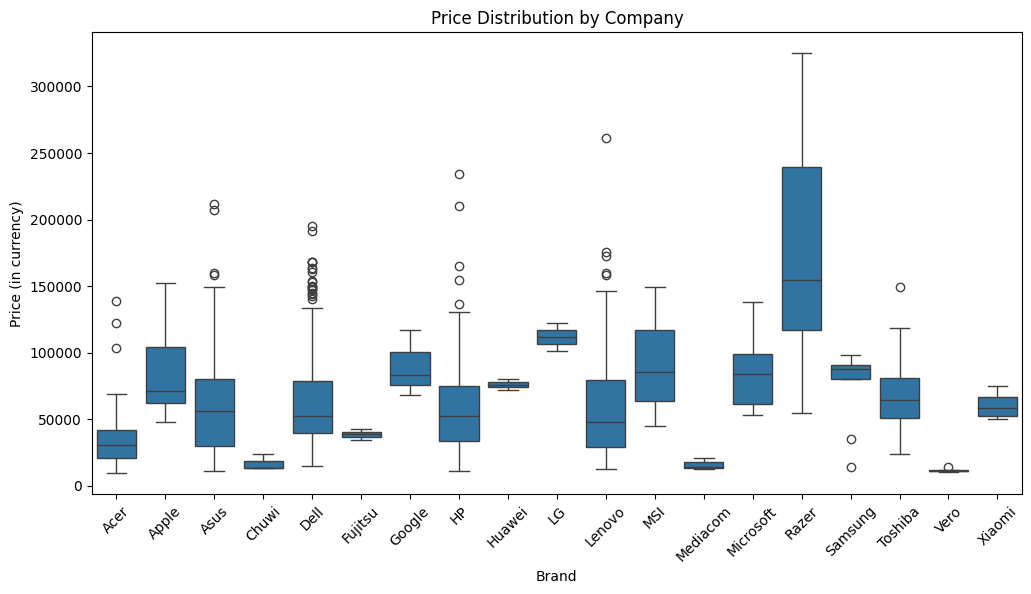

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot of Price distribution by Company
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Company', y='Price')
plt.title('Price Distribution by Company')
plt.xlabel('Brand')
plt.ylabel('Price (in currency)')
plt.xticks(rotation=45)
plt.show()


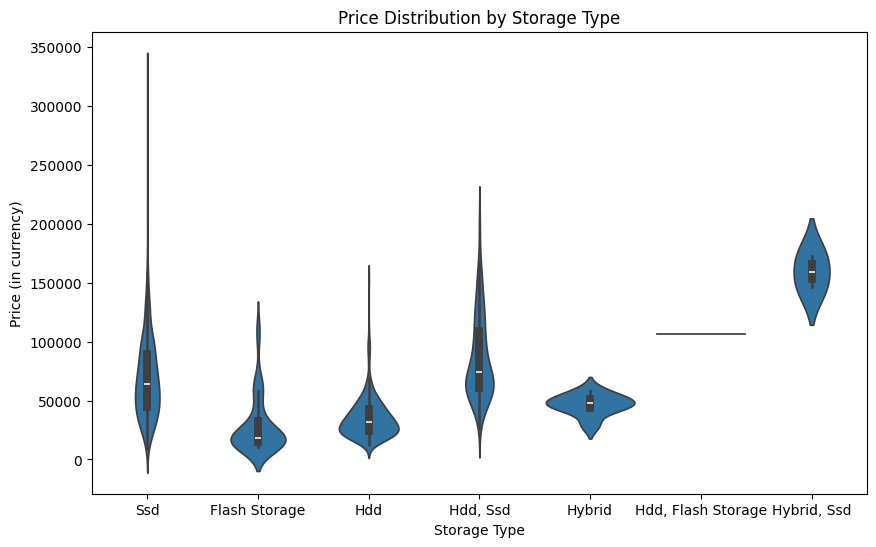

In [178]:
# Violin plot of Price by Storage_Type
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Storage_Type', y='Price')
plt.title('Price Distribution by Storage Type')
plt.xlabel('Storage Type')
plt.ylabel('Price (in currency)')
plt.show()


/var/folders/kc/mhm2kh_d3hsgh6c30kfnwmhw0000gn/T/ipykernel_39919/3986935658.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  os_distribution = df.groupby(['Company', 'OpSys']).size().unstack().fillna(0)


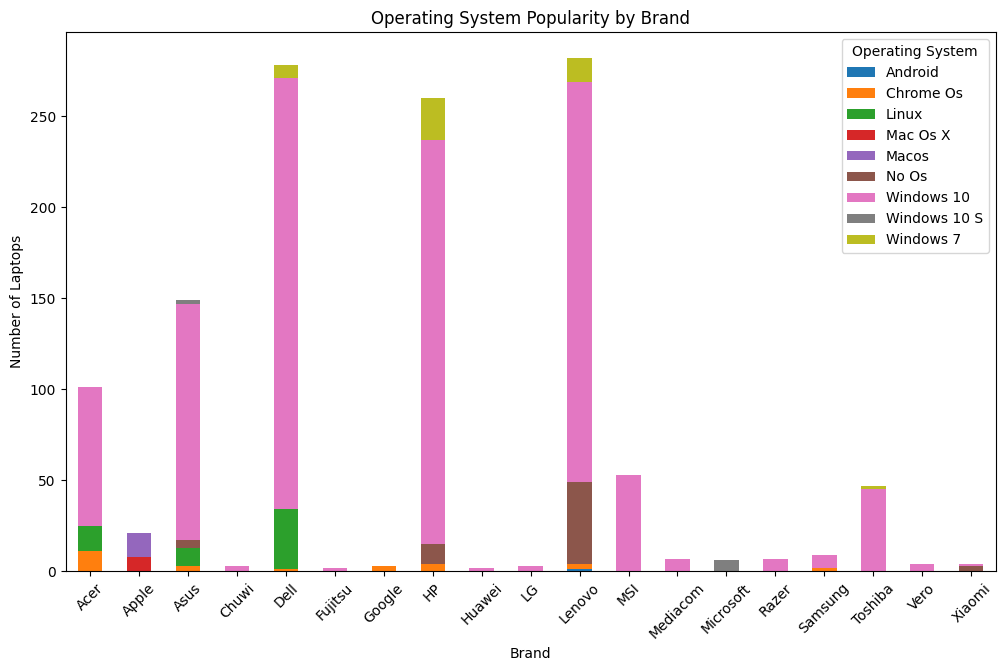

In [179]:
# Stacked bar chart of OS distribution by Company
os_distribution = df.groupby(['Company', 'OpSys']).size().unstack().fillna(0)
os_distribution.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Operating System Popularity by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Laptops')
plt.legend(title='Operating System', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()


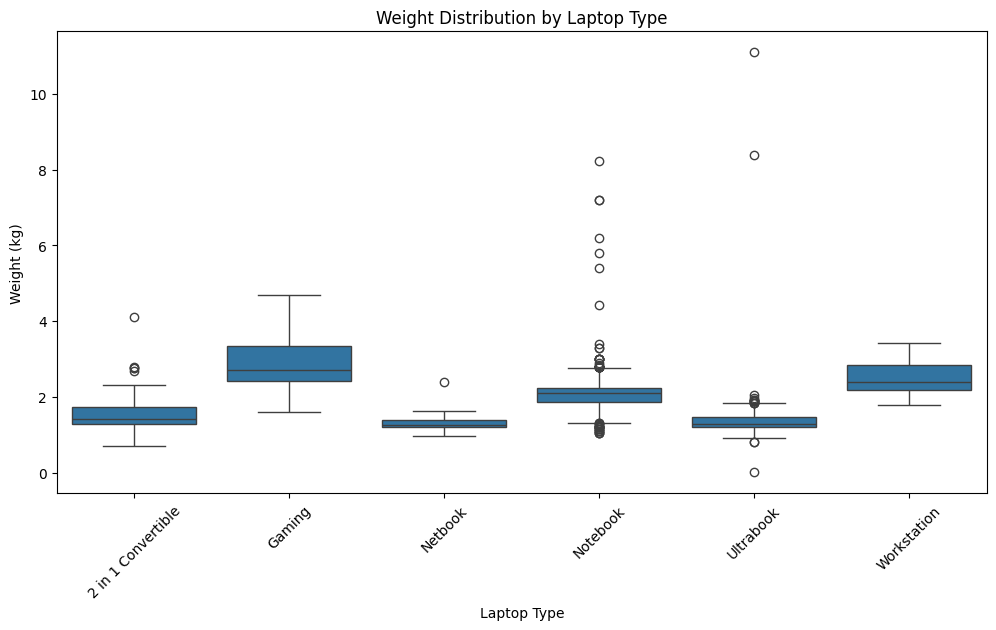

In [180]:
# Box plot of Weight by TypeName
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='TypeName', y='Weight')
plt.title('Weight Distribution by Laptop Type')
plt.xlabel('Laptop Type')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45)
plt.show()
